# Machine Learning Model Deployment 

# Model Tracking Using ML FLow
mini project by Group 1 Data Science B - MyEduSolve

# Use Case

* **Use Case Summary**


* **Objective Statement** :
    
    * Get business insight about the average, maximum and minimum minimum visitor and buyer
    * Get business insight about how many visitor in 30 day
    * Get business insight about how many buyer in 30 day
    * Get business insight about how many visitors buy more than once
    * Get business insight about how to predict buyers based on visitors in one day using Machine Learning Simple Linear Regression
    * Deployment using ML Flow
    
    
* **Challanges** :
    * Do not know the time of data collection
    * Don't know what the opening and closing hours are


* **Methodology / Analytic Technique** :
    * Descriptive analysis
        * Describe the information such as, min/max value of each column, average, and the total count 
    * Graph analysis
    * Using Machine Learning to predict 
        * Using Simple Linear Regression
    * Using ML Flow to Deployment


* **Business Benefit**:

    * Gain insight to treat and keep customers based on segment
    * Gain insight to improve the quality of company services so that customers remain loyal and gain more profit for the company
    * Build machine learning using Simple Linear Regression
    * Deployment using MLFlow


* **Expected Outcome**:

    * Know about the average, maximum and minimum minimum visitor and buyer
    * Know how many visitor in 30 day?
    * Know how many buyer in 30 day?
    * know how many visitors buy more than once?
    * Know how to predict total buyers based on visitors in one day using Machine Learning Simple Linear Regression ?
    * Know how to Deployment using MLFlow?

# Business Understanding
* Data is a sales data in supermarkets based on visitors and buyers within 30 days:
    * How about the average, maximum and minimum minimum visitor and buyer
    * How many visitor in 30 day?
    * How many buyer in 30 day?
    * How many visitors buy more than once?
    * How to predict buyers based on visitors in one day using Machine Learning Simple Linear Regression?
    * How to Deployment using ML Flow?

# Data Understanding


* **Source Data**:
    * The dataset used is data from https://www.kaggle.com/datasets/reyanmatrika/supermarket-visitor-linear-regression
    * 30 day sales data
    * The raw data contains 30 rows and 2 columns.


* **Data Dictionary** :
    * Visitor : total number of visitors
    * Buyer : total number of visitors

# Data Preparation

* **Code use** :
    * Python 3.9.13
* **Package** : 
    * Pandas, Numpy, Matplotlib, Seaborn, Scipy, Sklearn, and Warning 

# Data Profiling

Data profiling refers to the process of examining, analyzing, reviewing and summarizing data sets to gain insight into the quality of data.

Import the library we need for data processing

In [1]:
# pip install mlflow

In [2]:
# pip install mlflow[extras]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

We load the supermarket dataset

In [4]:
df = pd.read_csv("supermarket_buyer.csv")

we display the top 5 rows of the supermarket dataset within 30 days

In [5]:
df.head()

,Visitor,Buyer
0,34,32
1,38,36
2,34,31
3,40,38
4,30,29


you can see these are the top 5 dataset displays, for example: 34 visitors can get 32 buyers, on different days, 38 visitors with 36 buyers

we display dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Visitor  30 non-null     int64
 1   Buyer    30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


here it can be seen if **the data type is appropriate** and **there is no missing value**

we check how many missing values are in the dataset

In [7]:
df.isna().sum()

Visitor    0
Buyer      0
dtype: int64

di sini bisa dilihat bila **tidak ada missing value**

# Data Cleansing

the data is clean **because there are no missing values and the data types are appropriate** so **no need for data cleansing**

# Exploratory Data Analysis

In statistics, exploratory data analysis is the approach of analyzing a data set to summarize its main characteristics, often using statistical charts and other data visualization methods

we are looking for a description of the dataset. The describe() function is used to display descriptive statistics from a data frame or series

In [8]:
df.describe()

,Visitor,Buyer
count,30.000000,30.000000
mean,35.200000,33.400000
std,3.763711,2.647054
min,29.000000,29.000000
25%,32.000000,31.250000
50%,35.000000,33.000000
75%,38.000000,36.000000
max,42.000000,38.000000


From the results of a descriptive analysis using 30 rows of data, some insights were obtained. The distribution of the data is still normal, this can be seen from the small standard deviation. **On average** buyers are 35 visitors with 33 purchases.**In busy times** , the maximum number of visitors is 42 visitors with **the most purchases** are 38. **The quietest visitors** are 29 visitors and **the minimum buyer** is 29 so that **it can be concluded that most likely when it is quiet every visitor buys 1 goods**. When there were 38 visitors, the average purchase was 36. When there were 35 visitors, the average buyer was 33. When there were 32 visitors, the average buyer was 31.

We show how many visitors using a bar chart

Text(0.5, 1.0, 'Visitor')

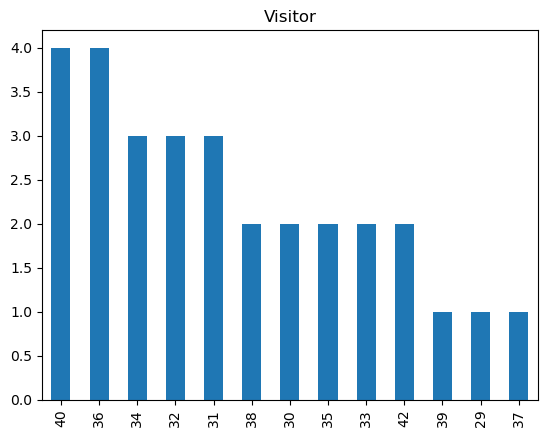

In [9]:
df['Visitor'].value_counts().plot(kind='bar')
plt.title('Visitor')

From visitor data in the last month, **the most frequent** (4 days) visitors came to the supermarket **as many as 40 and 36 visitors**. this might happen because **weekends** in one month can happen 4 times (Saturdays and Sundays). **the loneliest day** happened when one day only had **29 visitors**, fortunately it only happened for 1 day. **possibly** there will be no visitors because it falls on **Monday and it's raining**

We display the mode of the visitor

In [10]:
df['Visitor'].mode().values[0]

36

Visitor mode of 36 visitors, can be seen from the previous bar chart, days with a total of 36 visitors occur 4 times

we display the number of buyers using a bar chart

Text(0.5, 1.0, 'Buyer')

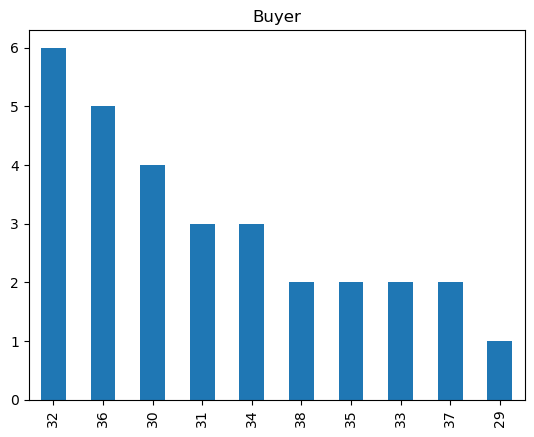

In [11]:
df['Buyer'].value_counts().plot(kind='bar')
plt.title('Buyer')

from the last month's data, most often (**6 days**) there are **32 buyers in one day**. it might happen because it coincides with **weekend and there is a promotion**. and **the loneliest** day of buyers occurred where there were only **29 buyers in one day.**

we show the mode of the Buyer

In [12]:
df['Buyer'].mode().values[0]

32

**Buyer's mode** is **32** so it can be concluded in the last month **often 32 buyers a day**

we show, is there a Visitor who buys more than once?

In [13]:
df[df['Buyer']>= df['Visitor']]

,Visitor,Buyer
15,32,38
16,36,37
19,29,30
22,30,34
23,32,35
24,36,36
25,31,32
26,31,32


can be seen here, the possibility of a visitor coming in one day to buy **more than one item is 26%**. this might happen because **visitor's friends / family ask to buy the same item as the visitor**

We show the distribution of Visitor data

<AxesSubplot:xlabel='Visitor', ylabel='Density'>

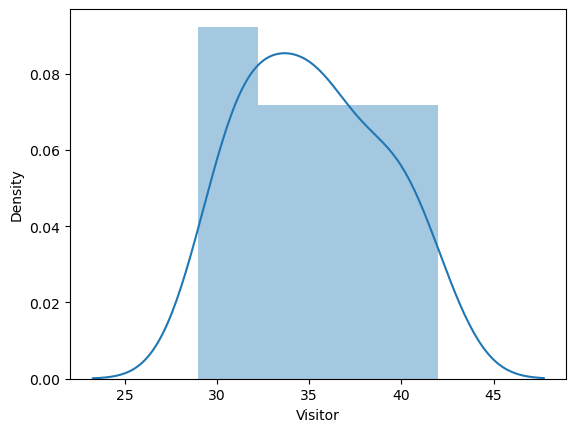

In [14]:
sns.distplot(df["Visitor"])

From the graph above it can be concluded that **data distribution is not normal**. **because the mean, mode and median are not the same**

we also show the distribution of buyers

<AxesSubplot:xlabel='Buyer', ylabel='Density'>

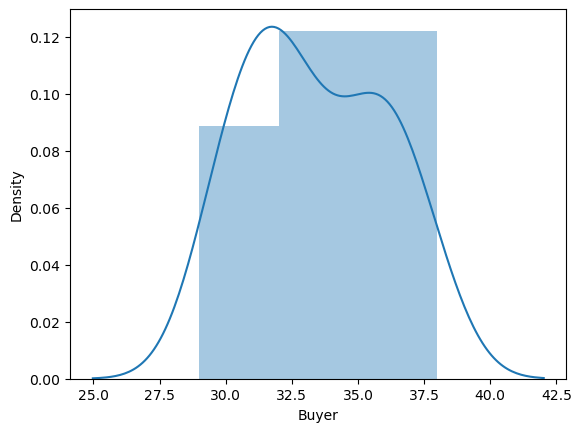

In [15]:
sns.distplot(df["Buyer"])

From the graph above it can be concluded that **data distribution is not normal**. **because the mean, mode and median are not the same**

we show whether there is multicollinearity of the data?

<AxesSubplot:>

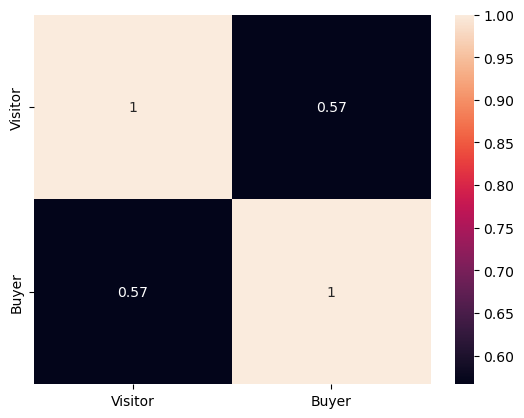

In [16]:
sns.heatmap(df.corr(), annot=True)

from heatmap, there is a strong relationship of total visitors to buyers. **the more visitors the more buyers**. with a correlation value on the heatmap of **0.57** where the figure is above **0.5**

# Preprocessing modelling

Data preprocessing is one of the steps in the data analysis process. In this process, **raw data** is retrieved and **prepared** into a format that is **understandable** and **analyzed by computers** and machine learning.

we use the Buyer target because we want to predict the Buyer

In [17]:
X = df.drop(["Buyer"],axis=1)
y = df["Buyer"]

We split training and test data sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 1/3, random_state = 42)

here we do split training and test. out of 30 data, **we use 1/3 of the data to be trained and the rest to be tested**

# Machine Learning Regression - Simple Linear Regression

The simple linear regression equation is an **equation model that describes the relationship of one independent variable** / predictor (X) **with one dependent variable** / response (Y), which is usually **described as a straight line**

* Fitting data for training

we input the regressor variable as a function of Linear Regression. It is enough to write LinearRegression() then the regression model has been prepared.

In [19]:
regressor = LinearRegression()
# regresor bisa diganti nama model atau apa bebas

here we use linear regression

we create a regression model for the train set by writing regressor.fit(X_train, y_train)

In [20]:
regressor.fit(X_train, y_train)
# disini data latihnya adalah YearExperience

LinearRegression()

let's see what the coefficient of the regressor is

In [21]:
regressor.coef_

array([0.30986888])

we can see that the coefficient of the regressor is 0.30986888

* Predict The Result

to make predictions using the .predict method. To find out what parameters are, we can see them through the object inspector. The required parameter is an independent variable, in this case X_test and not X_train. Why is that? Because we want to predict new data. If we use X_train then we make predictions based on X_train's understanding, even though the understanding itself is made based on X_train. Therefore, we use X_test. Later we will compare this prediction with y_test. If the results are close (the distance is not too far), then our model is good.

In [22]:
y_pred = regressor.predict(X_test) # anggep aja x disini ujian

we train predictions from 1/3 of the test data earlier

* Plot the Result

let's see how the predictions and actualnya

In [23]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
27,34,32.378882
15,38,31.139406
23,35,31.139406
17,30,30.829538
8,32,32.069013
9,36,33.308489
28,32,32.688751
24,36,32.378882
12,36,34.238095
0,32,31.759144


let's see how the actual and predictions are, and below is a display of the data in the form of a bar chart

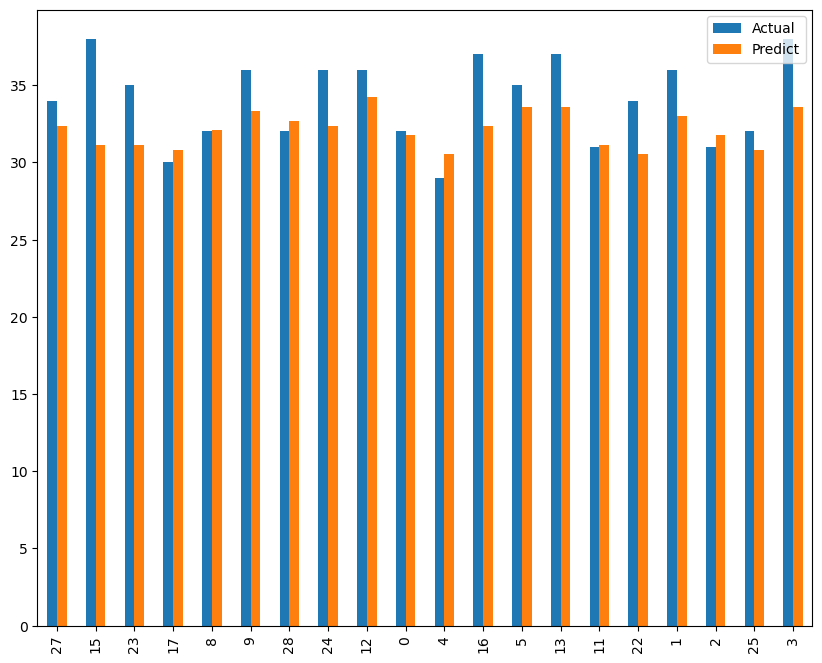

In [24]:
result.plot(kind = "bar", figsize = (10, 8))
plt.show()

from the bar chart above it can be concluded that **predictions** and **actual are not too far away**

We make X_train and y_train scatter plots in red for the data points

we make the line plot (regression line) in blue. plot() method takes the first parameter which is the data points for the x-axis, and the second parameter is the data points for the y-axis.

<function matplotlib.pyplot.show(close=None, block=None)>

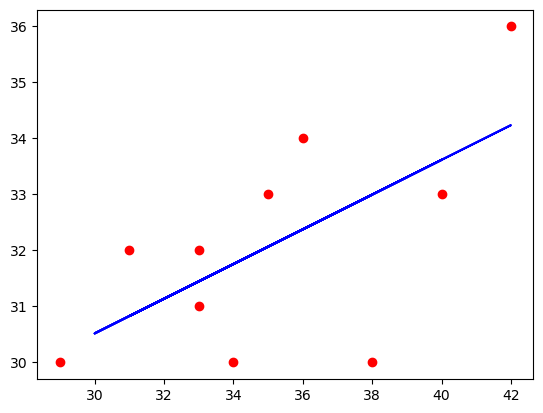

In [25]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test.values ,y_pred,color = 'blue')
plt.show

maybe because the data is too little (30) the actual data (red dots) is not too close to the predicted data (blue line)

Judging from the data, there is a relationship between total visitors and total buyers where **the more visitors, the more buyers**. vice versa, where **the fewer visitors the less buyers**. **there were 42 visitors a day** but a total of **only 36 buyers** probably because **the goods ran out or the visitors only looked at the supermarket**. and from **29 visitors buying 30 is likely to occur because visitors buy more than 1x**

# Evaluate Model

we evaluate Supermarket data processing, using RMSE MAE MAPE and R2 to find out what effect the model has on the data

## RMSE

- Root Mean Squared Error (RMSE) is one way to evaluate a linear regression model by measuring the accuracy of the forecast results of a model.

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.9032768988296604

here we can get the **RMSE of 2.9032768988296604**. This RMSE is **relatively small** so that the **model formed is good for predicting** the data.

## MAE

- MAE (Mean Absolute Error) is the average difference between the absolute (actual) and predicted (forecasting) values.

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.30407177363699

here we can get **MAE of 2.30407177363699**. This RMSE is classified as **small enough so that the model formed is good** to predict the data.

## MAPE

- Mean Absolute Percentage error (MAPE) is the absolute average percentage error.

In [28]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.06482235882578176

Mape : absolute percentage of **mean error** is 0.06482235882578176 or **6%** . This mape is classified as **small enough** so that the model formed is **good for predicting the data**.

## R2

- R squared is a number ranging from 0 to 1 which indicates the magnitude of the combination of independent variables that jointly affect the value of the dependent variable. The R-squared value (R2) is used to assess how much influence certain independent latent variables have on the dependent latent variable.

In [29]:
r2 = r2_score(y_test, y_pred)
r2

-0.17929580290702618

here we can get the MAE of -0.17929580290702618. This R2 means that the correlation is not too strong between visitors and buyers

**Results** of **RMSE, MAE, and MAPE** from simple linear regression models without and with Cross Validation and Hyperparameter Tuning have **values that are relatively small**. This shows that **the prediction error is also quite small** so **the model is classified as very good in terms of predicting the data**.

# Build a Model With Cross Validation

we create a model using cross validation to get better results

we reuse the linear regression model

In [30]:
regressor = LinearRegression()

we calculate with cross value score

In [31]:
scores = cross_val_score(regressor,X_train,y_train,scoring='r2',cv=3)
scores

array([-1.12319223, -0.05942986, -0.53914141])

results obtained -1.12319223, -0.05942986, -0.53914141

we display the default parameters

In [32]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# Hyperparameter Tuning

here we will look for what parameters are the best

In [33]:
parameters = {'copy_X': [True,False],
            'fit_intercept': [True,False],
            'n_jobs': [None,-1],
            'normalize': [True,False],
            'positive': [True,False]}

In [34]:
grid = GridSearchCV (estimator = regressor, param_grid = parameters, cv = 3)

In [35]:
best_model = grid.fit(X_train, y_train)

We show the best parameters

In [36]:
best_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': True}

from the grid results, we get copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': True

# Building a Model With Hyperparameter Tuning

we build a model using the results of the best model above

we pass the best parameter to LinearRegression

In [37]:
#Model with best param
regressor_new = LinearRegression(positive=False, normalize=True, n_jobs=None, fit_intercept=True, copy_X=True)

we train again using the best parameter

In [38]:
# train with best parameter
model_new = regressor_new.fit(X_train,y_train)

we predict using the best parameter

In [39]:
# predict with best parameter
y_pred_new = regressor_new.predict(X_test)

# Evaluate New Model

we re-evaluate with Hyperparameter Tuning

# RMSE

we show the RMSE results with the new model

In [40]:
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))
rmse_new

2.9032768988296604

# MAE

we show the results of MAE with the new model

In [41]:
mae_new = mean_absolute_error(y_test, y_pred_new)
mae_new

2.30407177363699

# MAPE

we show the results of MAPE with the new model

In [42]:
mape_new = mean_absolute_percentage_error(y_test, y_pred_new)
mape_new

0.06482235882578176

# R2

we show the results of R2 with the new model

In [43]:
r2_new = r2_score(y_test, y_pred_new)
r2_new

-0.17929580290702618

## Comparing RMSE, MAE,  MAPE and R2 before and after hyperparameter tuning

# Compare RMSE

comparison of the RMSE results of the old model with the new one

In [44]:
comp_rmse=pd.DataFrame({"RMSE" :["Before","After"],"Value":[rmse,rmse_new]})

we check whether the old model results are the same as the new data

In [45]:
print(rmse > rmse_new)
print(rmse == rmse_new)
print(rmse_new - rmse)

False
True
0.0


here it is obtained if before and after the hyperparameter there is no change, either because the data is too small or something

__________________________

# Compare MAE

comparison of the MAE results of the old model with the new one

In [46]:
comp_mae=pd.DataFrame({"MAE" :["Before","After"],"Value":[mae,mae_new]})

we check whether the old model results are the same as the new data

In [47]:
print(mae > mae_new)
print(mae == mae_new)
print(mae_new - mae)

False
True
0.0


here it is obtained if before and after the hyperparameter there is no change, either because the data is too small or something

__________________________

# Compare MAPE

comparison of the MAPE results of the old model with the new one

In [48]:
comp_mape=pd.DataFrame({"MAPE" :["Before","After"],"Value":[mape,mape_new]})
comp_mape

,MAPE,Value
0,Before,0.064822
1,After,0.064822


we check whether the old model results are the same as the new data

In [49]:
print(mape > mape_new)
print(mape == mape_new)
print(mape_new - mape)

False
True
0.0


here it is obtained if before and after the hyperparameter there is no change, either because the data is too small or something

__________________________

# Compare R2

comparison of the R2 results of the old model with the new one

In [50]:
comp_r2=pd.DataFrame({"R2" :["Before","After"],"Value":[r2,r2_new]})
comp_r2

,R2,Value
0,Before,-0.179296
1,After,-0.179296


we check whether the old model results are the same as the new data

In [51]:
print(r2 > r2_new)
print(r2 == r2_new)
print(r2_new - r2)

False
True
0.0


here it is obtained if before and after the hyperparameter there is no change, either because the data is too small or something

# Deployment

we enter the vscode training data

In [52]:
# Importing Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

# load dataset

df = pd.read_csv("supermarket_buyer.csv")

# Preproseccing Model
X = df.drop(["Buyer"],axis=1)
y = df["Buyer"]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/3, random_state = 42)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, mape, r2

# modeling

with mlflow.start_run():
        lr = LinearRegression (positive=False, normalize=True, n_jobs=None, fit_intercept=True, copy_X=True)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        (rmse, mae, mape, r2) = eval_metrics(y_test, y_pred)

        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  MAPE: %s" % mape)
        print("  R2: %s" % r2)


        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mape", mape)
        mlflow.log_metric("r2", r2)
    

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Linear Regression")
        else:
            mlflow.sklearn.log_model(lr, "model")

  RMSE: 2.9032768988296604
  MAE: 2.30407177363699
  MAPE: 0.06482235882578176
  R2: -0.17929580290702618


# Result


From the results of a descriptive analysis using 30 rows of data, some insights were obtained. The distribution of the data is still normal, this can be seen from the small standard deviation. **On average** buyers are 35 visitors with 33 purchases.**In busy times** , the maximum number of visitors is 42 visitors with **the most purchases** are 38. **The quietest visitors** are 29 visitors and **the minimum buyer** is 29 so that **it can be concluded that most likely when it is quiet every visitor buys 1 goods**. When there were 38 visitors, the average purchase was 36. When there were 35 visitors, the average buyer was 33. When there were 32 visitors, the average buyer was 31.

From visitor data in the last month, **the most frequent** (4 days) visitors came to the supermarket **as many as 40 and 36 visitors**. this might happen because **weekends** in one month can happen 4 times (Saturdays and Sundays). **the loneliest day** happened when one day only had **29 visitors**, fortunately it only happened for 1 day. **possibly** there will be no visitors because it falls on **Monday and it's raining**

from the last month's data, most often (**6 days**) there are **32 buyers in one day**. it might happen because it coincides with **weekend and there is a promotion**. and **the loneliest** day of buyers occurred where there were only **29 buyers in one day.**

can be seen here, the possibility of a visitor coming in one day to buy **more than one item is 26%**. this might happen because **visitor's friends / family ask to buy the same item as the visitor**

from Visitor and Buyer distribution. the graph above it can be concluded that **data distribution is not normal**. **because the mean, mode and median are not the same**

from heatmap, there is a strong relationship of total visitors to buyers. **the more visitors the more buyers**. with a correlation value on the heatmap of **0.57** where the figure is above **0.5**


we can get the **RMSE of 2.9032768988296604**. This RMSE is **relatively small** so that the **model formed is good for predicting** the data.


we can get **MAE of 2.30407177363699**. This RMSE is classified as **small enough so that the model formed is good** to predict the data.

Mape : absolute percentage of **mean error** is 0.06482235882578176 or **6%** . This mape is classified as **small enough** so that the model formed is **good for predicting the data**.

here we can get the MAE of -0.17929580290702618. This R2 means that the correlation is not too strong between visitors and buyers

**Results** of **RMSE, MAE, and MAPE** from simple linear regression models without and with Cross Validation and Hyperparameter Tuning have **values that are relatively small**. This shows that **the prediction error is also quite small** so **the model is classified as very good in terms of predicting the data**.

When we compate with Cross model, the results obtained both before and after the results are the same

with deployment code, we got same score like :   

RMSE: 2.9032768988296604
  
  MAE: 2.30407177363699
  
  MAPE: 0.06482235882578176
  
  R2: -0.17929580290702618

# Recomendation

It's been good between visitors and total buyers, but **needs to increase the value of existing goods** because you can see there are still **visitors just looking at them without buying**

on **weekend** you can **multiply goods** because buyers occur at that time

on **weekday** you can **promote goods** and **discounts for the number of buyers**

# Deployment Result

MLFlow is a tool used to make it easier for Data Scientists so they don't have to worry about organizing models, recording each experiment, and facilitating the deployment process.

there are several features in mlflow, but what we use is model tracking on rmse, mae, mape, and r2

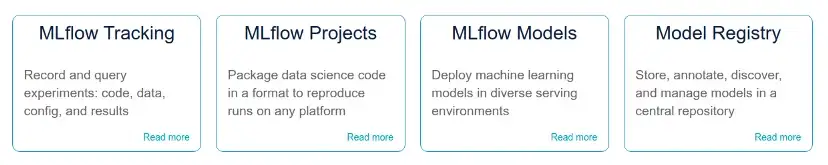

Model tracking is a feature for recording experiments so that each experiment will be properly recorded in mlflow.